In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import Sequence

# Print the TensorFlow version
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.18.0


In [3]:

# STEP 1: DEFINE DATASET PATHS
dataset_path = r"C:\Users\jones\OneDrive\Desktop\Brain_Tumor_Detection"
train_dir = os.path.join(dataset_path, "Training")
test_dir = os.path.join(dataset_path, "Testing")
categories = ["glioma", "meningioma", "notumor", "pituitary"]


In [4]:

# STEP 2: LOAD DATASET AND CREATE DATAFRAME
def load_data(directory, categories):
    data = []
    for category in categories:
        folder_path = os.path.join(directory, category)
        images = os.listdir(folder_path)
        count = len(images)
        data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))
    return pd.concat(data, ignore_index=True)

train_df = load_data(train_dir, categories)


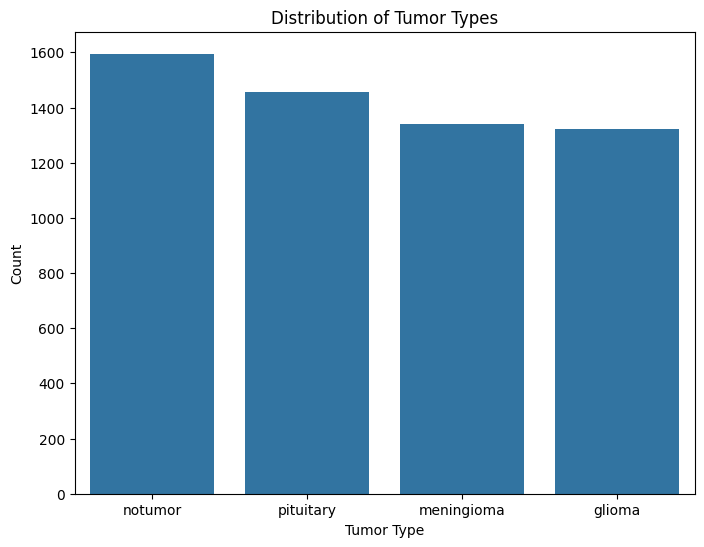

In [5]:

# STEP 3: VISUALIZE TUMOR DISTRIBUTION
def plot_tumor_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x="Category", order=df['Category'].value_counts().index)
    plt.title("Distribution of Tumor Types")
    plt.xlabel("Tumor Type")
    plt.ylabel("Count")
    plt.show()

plot_tumor_distribution(train_df)


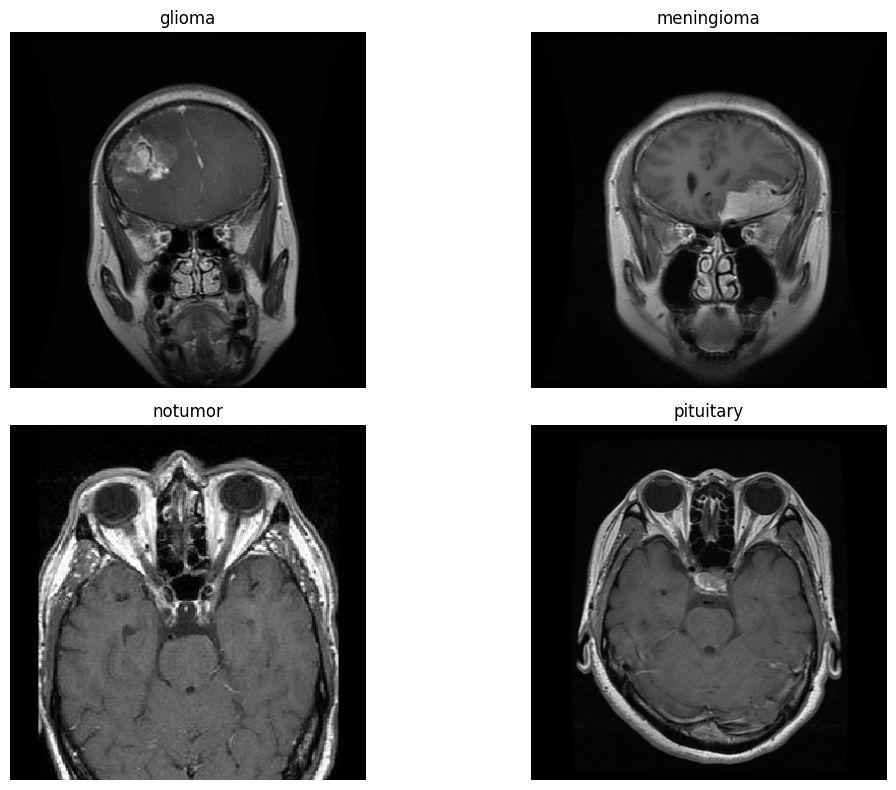

In [6]:

# STEP 4: DISPLAY SAMPLE IMAGES FOR EACH TUMOR TYPE
def display_sample_images(categories, train_dir):
    plt.figure(figsize=(12, 8))
    for i, category in enumerate(categories):
        folder_path = os.path.join(train_dir, category)
        image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
        img = plt.imread(image_path)
        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

display_sample_images(categories, train_dir)


In [7]:

# STEP 5: SET IMAGE SIZE AND BATCH SIZE
image_size = (150, 150)
batch_size = 32
epochs = 50


In [ ]:

# STEP 6: DATA AUGMENTATION
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:

# STEP 7: BUILD THE CNN MODEL
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



In [ ]:
# STEP 8: TRAIN THE MODEL
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


c:\Users\jones\OneDrive\Desktop\Brain_Tumor_Detection\.env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.4508 - loss: 1.1831 - val_accuracy: 0.6680 - val_loss: 0.9429
Epoch 2/50
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:13 754ms/step - accuracy: 0.7188 - loss: 0.7623

C:\Users\jones\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7188 - loss: 0.7623 - val_accuracy: 0.9677 - val_loss: 0.2353
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 169s 945ms/step - accuracy: 0.7160 - loss: 0.7364 - val_accuracy: 0.5797 - val_loss: 1.1491
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.7500 - loss: 0.6946 - val_accuracy: 0.4516 - val_loss: 1.3055
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 156s 877ms/step - accuracy: 0.7514 - loss: 0.6343 - val_accuracy: 0.6164 - val_loss: 1.1240
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6875 - loss: 0.8336 - val_accuracy: 0.8065 - val_loss: 0.5232
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 160s 897ms/step - accuracy: 0.7834 - loss: 0.5643 - val_accuracy: 0.7180 - val_loss: 0.8192
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.7188 - loss: 0.6879 - val_accuracy: 0.7097 - val_loss: 0.6002
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 149s 836ms/step - accuracy: 0.7948 - loss: 0.5230 - val_acc

KeyboardInterrupt: 

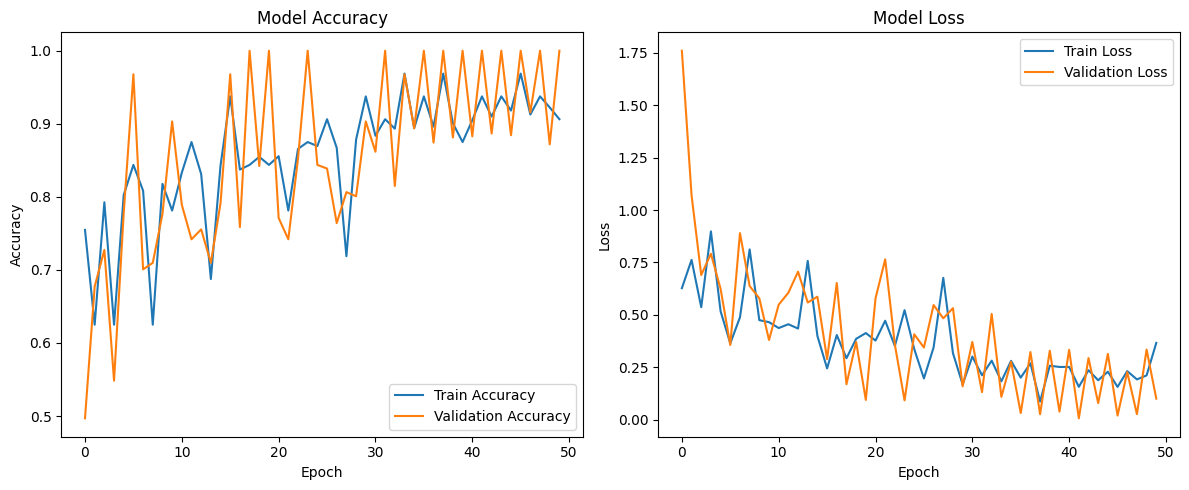

In [ ]:

# STEP 9: PLOT ACCURACY AND LOSS
def plot_metrics(history):
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_metrics(history)


In [ ]:

# STEP 10: EVALUATE THE MODEL
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step - accuracy: 0.8010 - loss: 0.5137
Test Loss: 0.3274
Test Accuracy: 0.8789


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step


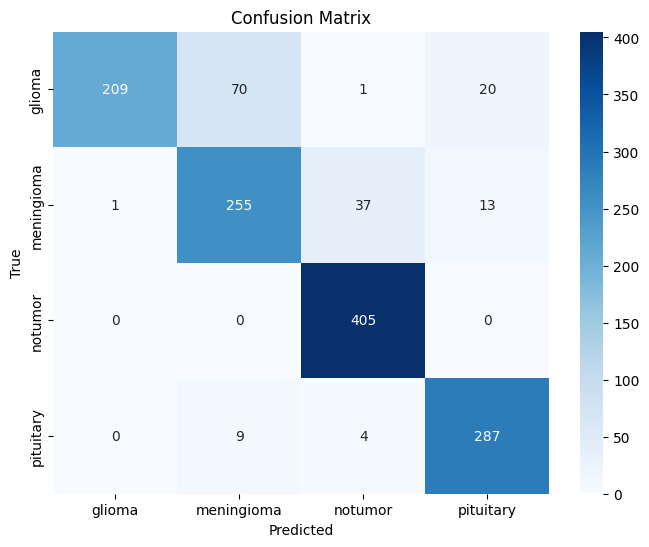

In [ ]:

# STEP 11: CONFUSION MATRIX
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix.numpy(), annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:

# STEP 12: CALCULATE PRECISION, RECALL AND F1-SCORE
def calculate_metrics(cm):
    precision = np.diag(cm) / np.sum(cm, axis=0)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return precision, recall, f1_score

precision, recall, f1_score = calculate_metrics(confusion_matrix.numpy())
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"F1-Score: {f1_score[i]:.4f}\n")


Class: glioma
Precision: 0.9952
Recall: 0.6967
F1-Score: 0.8196

Class: meningioma
Precision: 0.7635
Recall: 0.8333
F1-Score: 0.7969

Class: notumor
Precision: 0.9060
Recall: 1.0000
F1-Score: 0.9507

Class: pituitary
Precision: 0.8969
Recall: 0.9567
F1-Score: 0.9258



In [ ]:

# STEP 13: SAVE THE MODEL
model.save("Brain_tumor_detection_model.keras")

NameError: name 'model' is not defined